<a href="https://colab.research.google.com/github/chutommy/jupyter_scripts/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Astrologická olympiáda
*Krajské kolo 2021/22, kategorie AB (3. a 4. ročník SŠ)*

## D - Praktická úloha

## Python knihovny

* [numpy](https://numpy.org/)
* [scipy](https://scipy.org/)
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)

### Nahrání dat
**Zdroj**: [PSRB1257+12](https://olympiada.astro.cz/zadani/PSRB1257+12.dat)

In [222]:
import requests

data_url = "https://olympiada.astro.cz/zadani/PSRB1257+12.dat"

# HTTP požadavek
response = requests.get(url=data_url)
response.raise_for_status()

# zpracování dat
raw_records = []
for line in response.text.splitlines(keepends=False):
    line = line.strip()
    record = line.split(sep="   ")

    raw_records.insert(0, record)

### Formátování

In [223]:
import numpy as np
import pandas as pd

p0 = 6218530

# parsování dat
epoch, values = zip(*raw_records)
e = np.array(list(epoch))
x = np.array(list(values), dtype=float) + float(p0)

# epd = np.arange(0, len(x))
epd = pd.Series(data=e)
xpd = pd.Series(data=x)

### Analýza

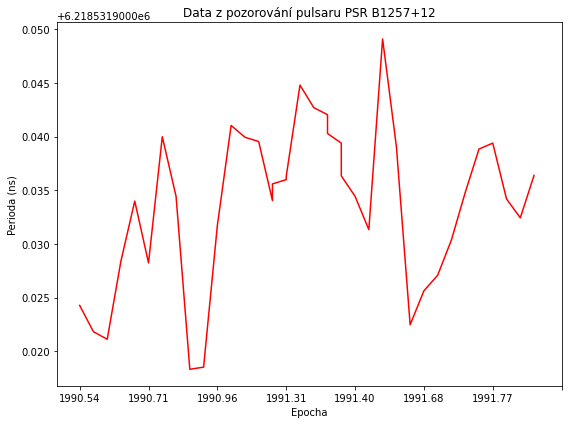

In [224]:
import matplotlib.pyplot as plt

# vizualice naměřených dat
plt.figure(figsize=(8, 6))
plt.plot(epd, xpd, color="red")
plt.xticks(np.arange(0, len(xpd) - 1, 5))
plt.xlabel("Epocha")
plt.ylabel("Perioda (ns)")
plt.title("Data z pozorování pulsaru PSR B1257+12")
plt.tight_layout()

plt.show()

#### Analýza významných frekvencí

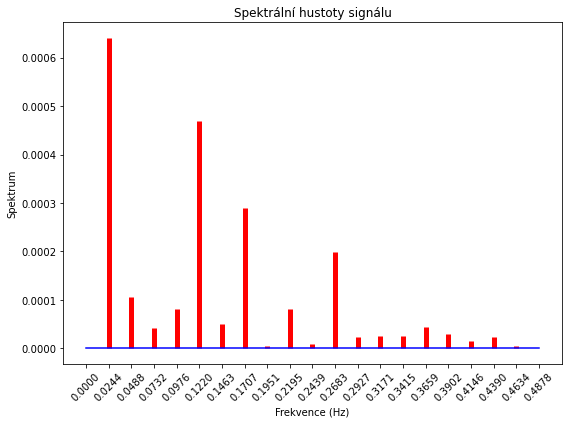

[0.         0.02439024 0.04878049 0.07317073 0.09756098 0.12195122
 0.14634146 0.17073171 0.19512195 0.2195122  0.24390244 0.26829268
 0.29268293 0.31707317 0.34146341 0.36585366 0.3902439  0.41463415
 0.43902439 0.46341463 0.48780488]


In [225]:
from scipy import signal

fs = len(x)

# odhad spektrální hustoty pomocí periogramu
freq, Pxx = signal.periodogram(x)

plt.figure(figsize=(8, 6))
markerline, stemlines, baseline = plt.stem(freq, abs(Pxx), "r", markerfmt=" ", basefmt="b", use_line_collection=True)
plt.setp(stemlines, "linewidth", 5)
plt.gca().set_xticks(freq)
plt.xticks(rotation=45)
plt.xlabel("Frekvence (Hz)")
plt.ylabel("Spektrum")
plt.title("Spektrální hustoty signálu")
plt.tight_layout()

plt.show()

print(freq)

Je možné sledovat 4 významné frekvence:
* 0.024390 Hz
* 0.121951 Hz
* 0.170732 Hz
* 0.268293 Hz

Text(0.5, 1.0, 'Model')

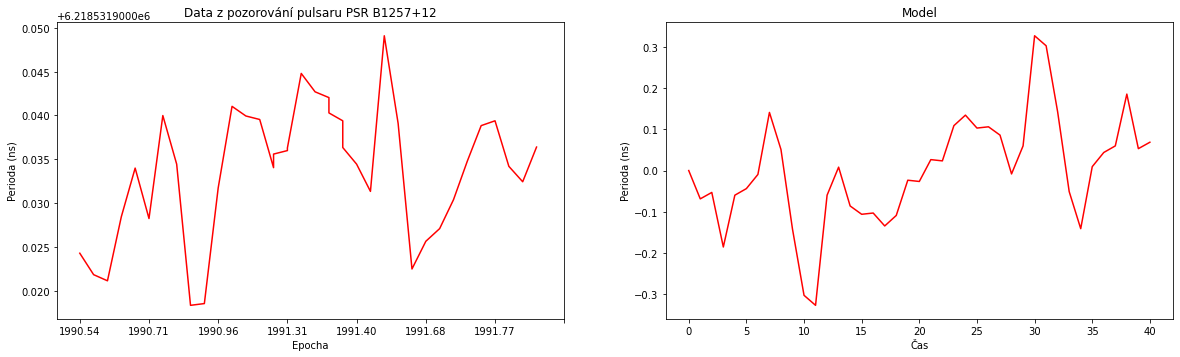

In [226]:
from numpy.fft import rfft

t = np.arange(0, len(x))
# výpočet hodnoty amplitud algoritmem FFT (Fast Fourier Transformation)
ampl = rfft(x)

def createModel(arr):
    model = np.zeros(len(t))

    for i in arr:
        f = freq[i]
        a = float(ampl[i].real)
        model += a * np.sin(2 * np.pi * f * t)

    return model

model = createModel(range(len(freq)))

plt.figure(figsize=(20,12))

ax1 = plt.subplot(221)
ax1.plot(epd, xpd, color="red")
ax1.set_xticks(np.arange(0, len(xpd) - 1, 5))
ax1.set_xlabel("Epocha")
ax1.set_ylabel("Perioda (ns)")
ax1.set_title("Data z pozorování pulsaru PSR B1257+12")

ax2 = plt.subplot(222)
ax2.plot(t, model, color="red")
ax2.set_xticks(np.arange(0, len(model), 5))
ax2.set_xlabel("Čas")
ax2.set_ylabel("Perioda (ns)")
ax2.set_title(f"Model")

Text(0.5, 1.0, 'Data z pozorování pulsaru PSR B1257+12')

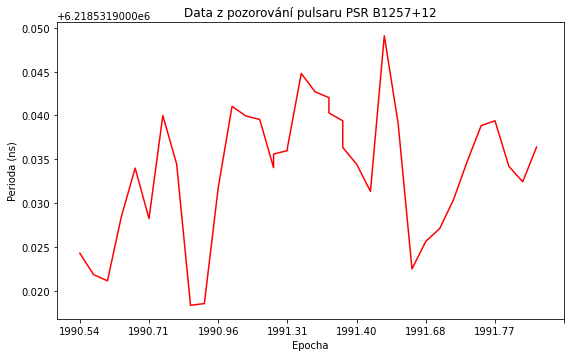

In [234]:
model1 = createModel([1, 5, 7, 11])
model2 = createModel([1, 5])
# TODO without significant freqs
# model3 = createModel()

plt.figure(figsize=(20,12))

# ax1 = plt.subplot(221)
# ax1.plot(epd, xpd, color="red")
# ax1.set_xticks(np.arange(0, len(xpd) - 1, 5))
# ax1.set_xlabel("Epocha")
# ax1.set_ylabel("Perioda (ns)")
# ax1.set_title("Data z pozorování pulsaru PSR B1257+12")